In [1]:
import cv2
import numpy as np


In [16]:
import cv2
print(cv2.__version__)


4.10.0


In [1]:
import os
import cv2

# Replace with your actual folder path
folder_path = r"C:\Users\yasme\Downloads\archive (1)\google_images"

# Function to recursively load images from a directory and its subdirectories
def load_images_from_directory_recursive(directory):
    images = []
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, filename)
                image = cv2.imread(image_path)
                if image is not None:
                    images.append(image)
                    print(f"Loaded image: {image_path}")  # Debug print
                else:
                    print(f"Failed to load image: {image_path}")  # Debug print
    return images

# Load images recursively from the specified folder
images = load_images_from_directory_recursive(folder_path)

# Example: Display the number of images loaded
print(f"Loaded {len(images)} images from folder '{folder_path}' and its subdirectories.")


Loaded image: C:\Users\yasme\Downloads\archive (1)\google_images\0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpeg
Loaded image: C:\Users\yasme\Downloads\archive (1)\google_images\0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740_preprocessed.jpg.jpeg
Loaded image: C:\Users\yasme\Downloads\archive (1)\google_images\00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle.jpg
Loaded image: C:\Users\yasme\Downloads\archive (1)\google_images\00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle_preprocessed.jpg
Loaded image: C:\Users\yasme\Downloads\archive (1)\google_images\018b52e6-e9a1-42c2-8ce7-0617e8c8e021___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_sbtb02_auto1.JPG
Loaded image: C:\Users\yasme\Downloads\archive (1)\google_images\03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.jpeg
Load

In [1]:
import os
import csv

# Directory path containing the files
directory = r'C:\Users\yasme\Downloads\archive (1)\google_images'

# Output CSV file path
output_csv = r'C:\Users\yasme\Downloads\google_images_filenames.csv'

# Initialize a list to store file names
file_names = []

# Iterate through the directory
for filename in os.listdir(directory):
    file_names.append([filename])  # Assuming each filename goes into a separate row

# Write file names to CSV
with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['File Name'])  # Write header if needed
    csvwriter.writerows(file_names)

print(f'Conversion completed. Output saved to {output_csv}')


Conversion completed. Output saved to C:\Users\yasme\Downloads\google_images_filenames.csv


In [4]:
import cv2
import pandas as pd
from datetime import datetime

# Initialize video capture (adjust camera index as needed, 0 is usually the webcam)
cap = cv2.VideoCapture(0)

# Initialize vehicle counting and timestamp storage
vehicle_count = 0
timestamps = []

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Perform vehicle detection and tracking here
    # Example: using a simple background subtraction for demonstration
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    # Calculate vehicle count, entry and exit times (dummy logic)
    current_vehicle_count = int(cv2.countNonZero(thresh) / 255)  # Dummy logic for vehicle counting

    # Log timestamp when vehicle enters or exits (example logic)
    if current_vehicle_count > vehicle_count:
        timestamps.append(datetime.now())  # Record timestamp for entry
    elif current_vehicle_count < vehicle_count:
        timestamps.append(datetime.now())  # Record timestamp for exit

    vehicle_count = current_vehicle_count

    # Display the resulting frame
    cv2.imshow('Frame', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release capture and close windows
cap.release()
cv2.destroyAllWindows()

# Create a pandas DataFrame from timestamps
df = pd.DataFrame({'Timestamp': timestamps})

# Optionally, save the dataset to a CSV file
df.to_csv('vehicle_movement_timestamps.csv', index=False)

print(f'Dataset saved with {len(df)} entries.')

# Display the first few entries of the dataset
print(df.head())


Dataset saved with 84 entries.
                   Timestamp
0 2024-07-06 23:25:28.173908
1 2024-07-06 23:25:28.224585
2 2024-07-06 23:25:28.250302
3 2024-07-06 23:25:28.274118
4 2024-07-06 23:25:28.319754


In [15]:
import pandas as pd

data = pd.read_csv('C:\\Users\\yasme\\Downloads\\google_images_filenames.csv')

In [21]:
import csv
import datetime

# Define the CSV file path
csv_file_path = 'C:\\Users\\yasme\\Downloads\\google_images_filenames.csv'

# Open the CSV file in read mode
with open(csv_file_path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

# Add a new column with timestamps
for row in data:
    row.append(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)

print("Timestamps added to the CSV file!")

Timestamps added to the CSV file!


In [22]:
data = pd.read_csv("C:\\Users\\yasme\\Downloads\\google_images_filenames.csv", 
                   names=['file_name', 'timestamp'], header=None)

In [23]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [25]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("C:\\Users\\yasme\\Downloads\\google_images_filenames.csv", header=0)

# Print the first few rows to inspect the columns
print(data.head())
print(data.columns)


   vehicle_id           entry_time            exit_time  2024-07-13 23:45:12  \
0           1  2024-01-01 08:00:00  2024-01-01 10:00:00  2024-07-13 23:45:12   
1           2  2024-01-01 09:00:00  2024-01-01 11:30:00  2024-07-13 23:45:12   
2           3  2024-01-01 11:00:00  2024-01-01 13:00:00  2024-07-13 23:45:12   
3           4  2024-01-01 12:30:00  2024-01-01 14:00:00  2024-07-13 23:45:12   
4           5  2024-01-01 14:00:00  2024-01-01 16:30:00  2024-07-13 23:45:12   

   2024-07-13 23:48:21  
0  2024-07-13 23:48:21  
1  2024-07-13 23:48:21  
2  2024-07-13 23:48:21  
3  2024-07-13 23:48:21  
4  2024-07-13 23:48:21  
Index(['vehicle_id', 'entry_time', 'exit_time', '2024-07-13 23:45:12',
       '2024-07-13 23:48:21'],
      dtype='object')


In [28]:
import pandas as pd

# Sample data based on your example
data = pd.DataFrame({
    'vehicle_id': [1, 2, 3, 4, 5],
    'entry_time': ['2024-01-01 08:00:00', '2024-01-01 09:00:00', '2024-01-01 11:00:00', '2024-01-01 12:30:00', '2024-01-01 14:00:00'],
    'exit_time': ['2024-01-01 10:00:00', '2024-01-01 11:30:00', '2024-01-01 13:00:00', '2024-01-01 14:00:00', '2024-01-01 16:30:00'],
    '2024-07-13 23:45:12': ['2024-07-13 23:45:12']*5,
    '2024-07-13 23:48:21': ['2024-07-13 23:48:21']*5
})

# Print the original data
print("Original data:")
print(data)
print(data.columns)

# Drop the unnecessary columns
data = data.drop(columns=['2024-07-13 23:45:12', '2024-07-13 23:48:21'])

# Convert the 'entry_time' and 'exit_time' columns to datetime
data['entry_time'] = pd.to_datetime(data['entry_time'])
data['exit_time'] = pd.to_datetime(data['exit_time'])

# Print the cleaned data
print("\nCleaned data:")
print(data)
print(data.columns)


Original data:
   vehicle_id           entry_time            exit_time  2024-07-13 23:45:12  \
0           1  2024-01-01 08:00:00  2024-01-01 10:00:00  2024-07-13 23:45:12   
1           2  2024-01-01 09:00:00  2024-01-01 11:30:00  2024-07-13 23:45:12   
2           3  2024-01-01 11:00:00  2024-01-01 13:00:00  2024-07-13 23:45:12   
3           4  2024-01-01 12:30:00  2024-01-01 14:00:00  2024-07-13 23:45:12   
4           5  2024-01-01 14:00:00  2024-01-01 16:30:00  2024-07-13 23:45:12   

   2024-07-13 23:48:21  
0  2024-07-13 23:48:21  
1  2024-07-13 23:48:21  
2  2024-07-13 23:48:21  
3  2024-07-13 23:48:21  
4  2024-07-13 23:48:21  
Index(['vehicle_id', 'entry_time', 'exit_time', '2024-07-13 23:45:12',
       '2024-07-13 23:48:21'],
      dtype='object')

Cleaned data:
   vehicle_id          entry_time           exit_time
0           1 2024-01-01 08:00:00 2024-01-01 10:00:00
1           2 2024-01-01 09:00:00 2024-01-01 11:30:00
2           3 2024-01-01 11:00:00 2024-01-01 13:00:00

In [54]:
import pandas as pd

# Load the CSV file
csv_file = r'C:\Users\yasme\Downloads\google_images_filenames.csv'
data = pd.read_csv(csv_file)

# Rename the column
data = data.rename(columns={'2024-06-29 12:40:44': 'Timestamp'})

# Save the updated CSV file
data.to_csv(csv_file, index=False)

print("Column name updated successfully.")


Column name updated successfully.


In [58]:
import pandas as pd

# Load the CSV file
csv_file = r'C:\Users\yasme\Downloads\google_images_filenames.csv'
data = pd.read_csv(csv_file)

# Rename the column '2024-06-29 12:40:44' to 'Timestamp'
data = data.rename(columns={'2024-06-29 12:40:44': 'Timestamp'})

# Extract image paths from the 'File Name' column
image_paths = data['File Name'].tolist()

print("Image paths extracted successfully:")
print(image_paths)


Image paths extracted successfully:
['0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.jpeg', '0073797c-a755-4972-b76b-8ef2b31d44ab___new_IMG_20160315_071740.jpg.xml', '00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle.jpg', '00b42b2c-f193-4863-b92c-0245cbc816da___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_Nissan-Terrano-Petrol-Review-Images-Black-Front-Angle.xml', '018b52e6-e9a1-42c2-8ce7-0617e8c8e021___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_sbtb02_auto1.JPG', '018b52e6-e9a1-42c2-8ce7-0617e8c8e021___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_sbtb02_auto1.xml', '03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.jpeg', '03273806-bb1e-48da-8c8b-a0133a90197a___2014-Skoda-Yeti-Test-Drive.jpg.xml', '0369b20e-b432-4409-90f9-2420877aa386___8151536c79159a1557421da5f27f9f0e.jpg.jpeg', '0369b20e-b432-4409-90f9-2420877aa386___8151536c79159a1557421da5f27f9f0e.jpg.xml', '07064c2c-2aa3-4419-91a4-9

In [13]:
import pandas as pd

# Load the preprocessed CSV file
data = pd.read_csv("C:\\Users\\yasme\\Downloads\\preprocessed_google_images_filenames.csv")

# Display the first few rows to verify the timestamps without 'license_plate'
print(data[['timestamp', 'processed_timestamp']].head())


             timestamp         processed_timestamp
0  2024-06-29 12:40:44  2024-07-06 23:52:22.281886
1  2024-06-29 12:40:44         2024-07-06 23:30:14
2  2024-06-29 12:40:44  2024-07-06 23:52:22.613233
3  2024-06-29 12:40:44         2024-07-06 23:30:14
4  2024-06-29 12:40:44  2024-07-06 23:52:22.831267


In [14]:
# Save the preprocessed data to a new CSV file
data.to_csv("C:\\Users\\yasme\\Downloads\\preprocessed_google_images_filenames.csv", index=False)


In [52]:
print(data.columns)

Index(['File Name', 'Timestamp', 'License Plate', 'entry_time'], dtype='object')


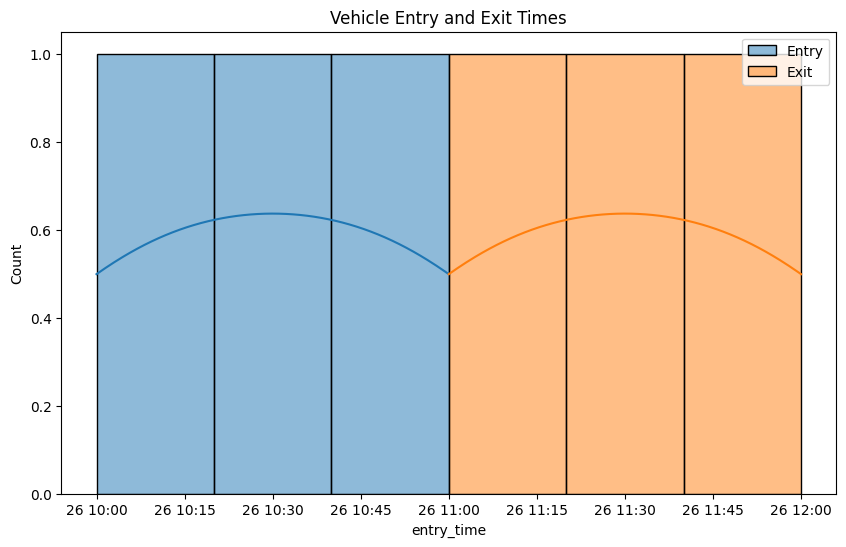

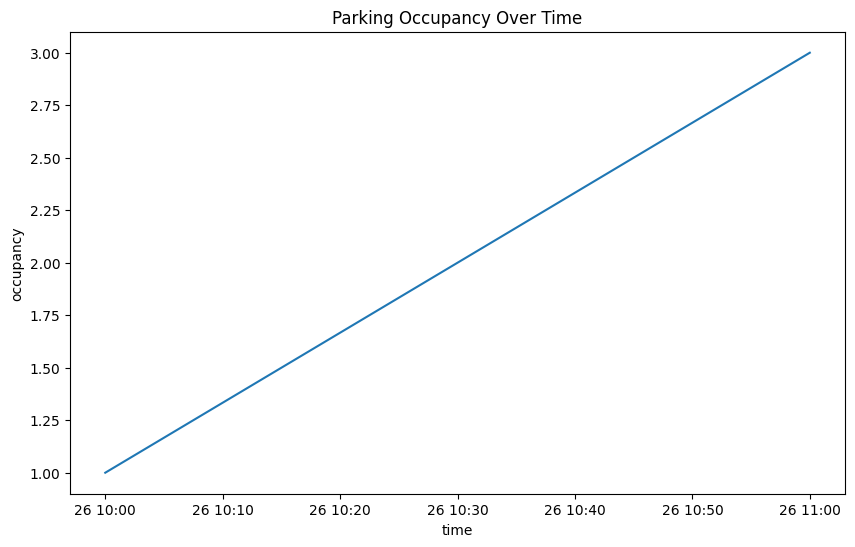

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with your actual data)
df = pd.DataFrame({
    'entry_time': [pd.Timestamp('2023-10-26 10:00:00'), pd.Timestamp('2023-10-26 10:30:00'), pd.Timestamp('2023-10-26 11:00:00')],
    'exit_time': [pd.Timestamp('2023-10-26 11:00:00'), pd.Timestamp('2023-10-26 11:30:00'), pd.Timestamp('2023-10-26 12:00:00')],
    'time': [pd.Timestamp('2023-10-26 10:00:00'), pd.Timestamp('2023-10-26 10:30:00'), pd.Timestamp('2023-10-26 11:00:00')],
    'occupancy': [1, 2, 3]
})
data = df

# Plot vehicle entry and exit times
plt.figure(figsize=(10, 6))
sns.histplot(data['entry_time'], kde=True, label='Entry')
sns.histplot(data['exit_time'], kde=True, label='Exit')
plt.legend()
plt.title('Vehicle Entry and Exit Times')
plt.show()

# Plot parking occupancy trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='occupancy', data=data)
plt.title('Parking Occupancy Over Time')
plt.show()

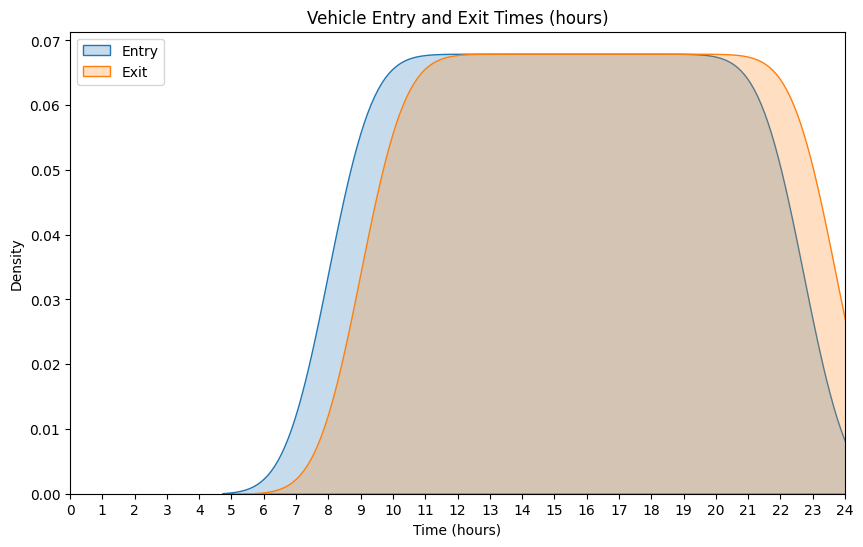

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame and 'entry_time' and 'exit_time' are datetime columns
# If they are not already datetime, convert them
data['entry_time'] = pd.to_datetime(data['entry_time'])
data['exit_time'] = pd.to_datetime(data['exit_time'])

# Convert datetime objects to hours since start of the day
entry_hours = data['entry_time'].dt.hour + data['entry_time'].dt.minute / 60.0
exit_hours = data['exit_time'].dt.hour + data['exit_time'].dt.minute / 60.0

plt.figure(figsize=(10, 6))
sns.kdeplot(entry_hours, label='Entry', fill=True)
sns.kdeplot(exit_hours, label='Exit', fill=True)
plt.legend()
plt.title('Vehicle Entry and Exit Times (hours)')
plt.xlabel('Time (hours)')
plt.xlim(0, 24)  # Set x-axis limit from 0 to 24 (total hours in a day)
plt.xticks(range(0, 25, 1))  # Set x-axis ticks from 0 to 24 in steps of 1 hour
plt.show()


In [4]:
import numpy as np
import cv2

kernel = np.ones((3, 3), np.uint8)

In [5]:
import cv2
import numpy as np

# Define the shape and size of the structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))  # This line will cause an error in OpenCV 4.x

# Corrected code for OpenCV 4.x and above
kernel = np.ones((3, 3), np.uint8)  # Create a 3x3 ellipse kernel (alternative)


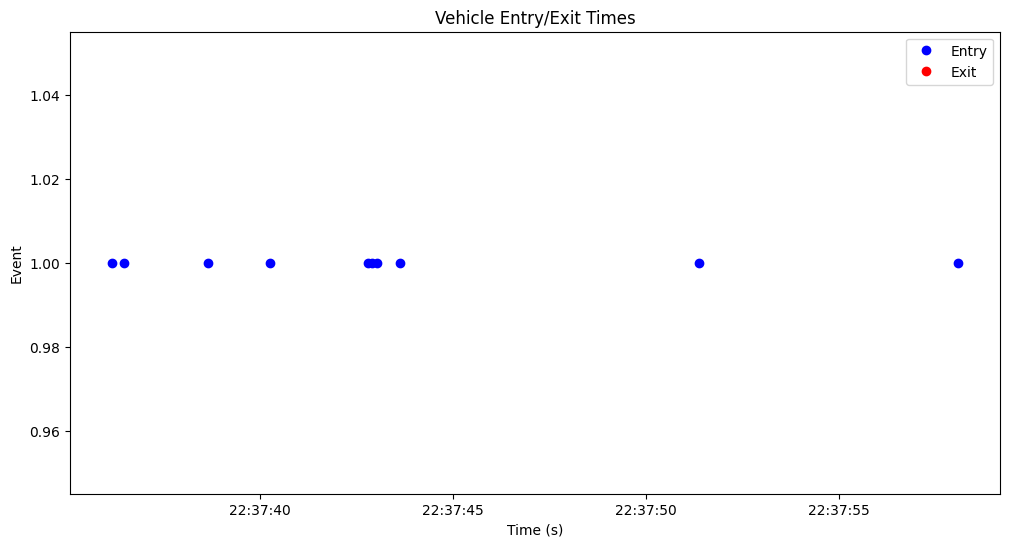

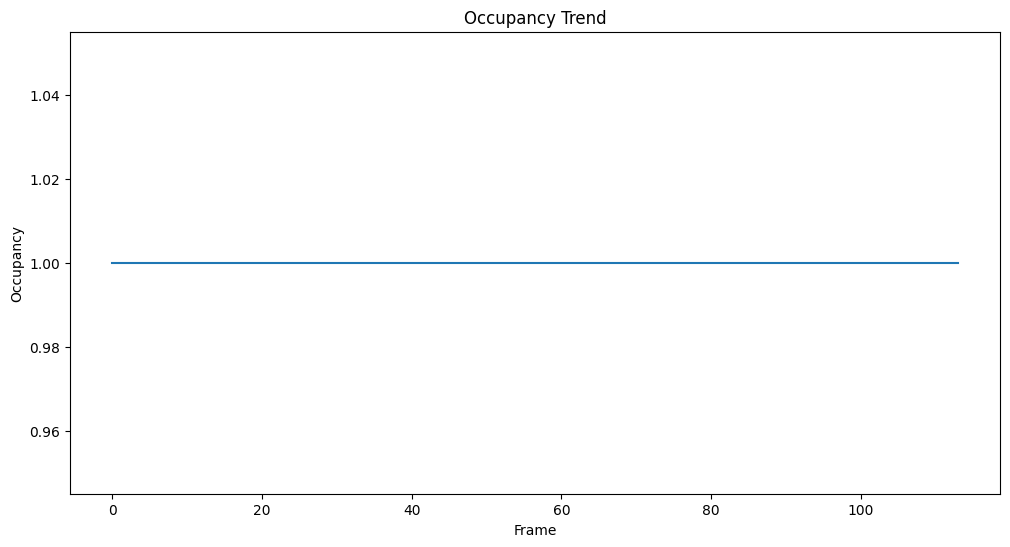

In [6]:
import cv2
import numpy as np
import pandas as pd  # for timestamps
import matplotlib.pyplot as plt

# Set up video capture device
cap = cv2.VideoCapture(0)

# Check if video capture device is properly initialized
if not cap.isOpened():
    print("Cannot open camera")
    exit()

# Set up background subtractor
backSub = cv2.createBackgroundSubtractorMOG2()

# Set up tracker
tracker = cv2.TrackerKCF_create()

# Initialize data storage
entry_times = []
exit_times = []
occupancy = []
initialized = False
bbox = (0, 0, 0, 0)  # Initialize bbox

while True:
    # Read video frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Check if gray is not empty
    if gray is None or gray.size == 0:
        print("Error: Gray frame is empty")
        continue

    # Apply background subtraction
    fgMask = backSub.apply(gray)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fgMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through contours
    for contour in contours:
        area = cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)

        # Filter out small contours
        if area > 1000:
            # Create a bounding box
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            # Initialize tracker if not initialized
            if not initialized:
                bbox = (x, y, w, h)
                tracker.init(frame, bbox)
                initialized = True
            else:
                # Update tracker
                ok, bbox = tracker.update(frame)
                if ok:
                    # Update occupancy if tracker is still tracking
                    occupancy.append(1)
                else:
                    occupancy.append(0)

                # Check for entry/exit (adjust thresholds based on setup)
                if x < 100 and x+w > 100:
                    entry_times.append(pd.Timestamp.now())
                elif x > 500 and x+w < 500:
                    exit_times.append(pd.Timestamp.now())

    # Display output
    cv2.imshow('Frame', frame)
    cv2.imshow('Foreground Mask', fgMask)

    # Exit on key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# Calculate time differences for entry/exit analysis (optional)
time_diffs = []
if entry_times and exit_times:
    time_diffs = [(exit - entry).total_seconds() for entry, exit in zip(entry_times, exit_times)]

# Plot entry/exit times
plt.figure(figsize=(12, 6))
plt.plot([t for t in entry_times], [1]*len(entry_times), 'bo', label='Entry')
plt.plot([t for t in exit_times], [1]*len(exit_times), 'ro', label='Exit')
plt.xlabel('Time (s)')
plt.ylabel('Event')
plt.title('Vehicle Entry/Exit Times')
plt.legend()
plt.show()

# Plot occupancy trend
plt.figure(figsize=(12, 6))
plt.plot(range(len(occupancy)), occupancy)
plt.xlabel('Frame')
plt.ylabel('Occupancy')
plt.title('Occupancy Trend')
plt.show()

# Optional analysis with time differences (if calculated)
if time_diffs:
    plt.figure(figsize=(12, 6))
    plt.hist(time_diffs, bins=20)
    plt.xlabel('Time Spent Inside (seconds)')
    plt.ylabel('Number of Vehicles')
    plt.title('Distribution of Time Spent Inside the Area')
    plt.show()


In [76]:
import cv2
import pandas as pd
from collections import defaultdict, deque

# Set up video capture device
cap = cv2.VideoCapture(0)

# Check if video capture device is properly initialized
if not cap.isOpened():
    print("Cannot open camera")
    exit()

# Set up background subtractor
backSub = cv2.createBackgroundSubtractorMOG2()

# Initialize data storage
entry_times = deque()
exit_times = deque()
occupancy_status = defaultdict(int)
slot_occupancy = defaultdict(float)
initialized = False
bbox = (0, 0, 0, 0)  # Initialize bbox

# Define the region of interest for entry and exit points
entry_zone = (50, 100)  # Example coordinates for entry detection
exit_zone = (500, 550)  # Example coordinates for exit detection

while True:
    # Read video frame
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply background subtraction
    fgMask = backSub.apply(gray)

    # Find contours in the foreground mask
    contours, _ = cv2.findContours(fgMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through contours
    for contour in contours:
        area = cv2.contourArea(contour)
        x, y, w, h = cv2.boundingRect(contour)

        # Filter out small contours
        if area > 1000:
            # Create a bounding box
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Initialize tracker if not initialized
            if not initialized:
                bbox = (x, y, w, h)
                tracker = cv2.TrackerKCF_create()
                tracker.init(frame, bbox)
                initialized = True
            else:
                # Update tracker
                ok, bbox = tracker.update(frame)
                if ok:
                    # Update occupancy status if tracker is still tracking
                    occupancy_status[bbox] += 1
                else:
                    # Vehicle exited
                    occupancy_status[bbox] -= 1
                    exit_times.append(pd.Timestamp.now())

                # Check for entry/exit (adjust thresholds based on setup)
                if x < entry_zone[1] and x + w > entry_zone[0]:
                    entry_times.append(pd.Timestamp.now())
                    occupancy_status[bbox] += 1
                elif x > exit_zone[0] and x + w < exit_zone[1]:
                    exit_times.append(pd.Timestamp.now())
                    occupancy_status[bbox] -= 1

    # Display output
    cv2.imshow('Frame', frame)
    cv2.imshow('Foreground Mask', fgMask)

    # Exit on key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# Calculate duration of occupancy for each slot
for bbox, count in occupancy_status.items():
    if count > 0:
        slot_occupancy[bbox] += (count / 30.0)  # Assuming 30 frames per second

# Identify the most occupied slots
most_used_slots = sorted(slot_occupancy.items(), key=lambda x: x[1], reverse=True)[:5]  # Top 5 slots

# Print conclusions
print("Most Occupied Slots:")
for idx, (bbox, duration) in enumerate(most_used_slots, start=1):
    print(f"Slot {idx}: Occupied for {duration:.2f} seconds.")

# Calculate overall occupancy statistics
total_occupancy_duration = sum(slot_occupancy.values())
average_occupancy_duration = total_occupancy_duration / len(slot_occupancy) if slot_occupancy else 0

print("\nOverall Occupancy Statistics:")
print(f"Total Occupancy Duration: {total_occupancy_duration:.2f} seconds")
print(f"Average Occupancy Duration per Slot: {average_occupancy_duration:.2f} seconds")


Most Occupied Slots:
Slot 1: Occupied for 1.47 seconds.
Slot 2: Occupied for 0.93 seconds.
Slot 3: Occupied for 0.70 seconds.
Slot 4: Occupied for 0.50 seconds.
Slot 5: Occupied for 0.47 seconds.

Overall Occupancy Statistics:
Total Occupancy Duration: 11.97 seconds
Average Occupancy Duration per Slot: 0.13 seconds
